In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import turicreate as tc

### Question 1
- Use the polynomial to generate 500 rows of x-y data (with a random component added to the y-values) and provide a scatter plot. 

Student number: 
0398801 
0398108

a = 4.5
b = 0
c = 4.5
d = 8

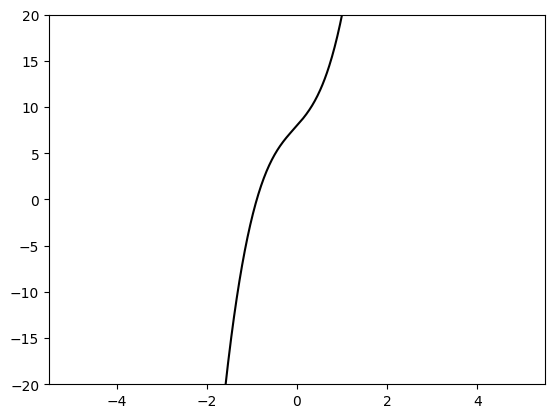

In [2]:
coefs = [8,5.5,1,5.5]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [3]:
X = []
Y = []
for i in range(500):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + (random.gauss(0,2)*5)
    #y = polynomial(coefs, x) + random.gauss(1,15)
    X.append(x)
    Y.append(y)

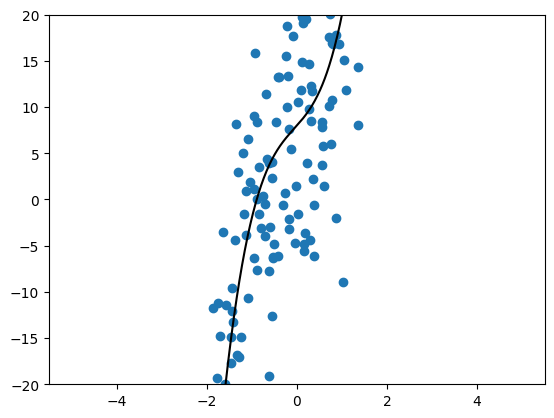

In [4]:
plt.scatter(X, Y)
draw_polynomial(coefs)

In [5]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
0.8771492242989529,17.849495617258334
-3.249812248432169,-175.7526603330918
-4.766600583808893,-584.1369578254946
3.0557621736859204,194.15996002907704
-4.783101292816724,-597.0936216013686
2.1935058453756273,90.29929783073747
4.513502193107314,559.9851557672529
-2.002179487672431,-47.93337854770908
-4.345532322797027,-447.78488921858366
2.1289129525038284,71.86713364537816


### Question 2
- Add columns to the dataset to hold powers of x up to xn and set n=10. Split the data so that 70% is used for training, 20% for validation, and 10% for testing.

In [6]:
n = 10
for i in range(2, n+1):
    string = 'x^'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data.print_rows(num_rows=10, num_columns=20)

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

+--------------------+---------------------+--------------------+
|         x          |          y          |        x^2         |
+--------------------+---------------------+--------------------+
| 0.8771492242989529 |  17.849495617258334 | 0.7693907616882548 |
| -3.249812248432169 |  -175.7526603330918 | 10.561279650059749 |
| -4.766600583808893 |  -584.1369578254946 | 22.720481125567282 |
| 3.0557621736859204 |  194.15996002907704 |  9.3376824621297   |
| -4.783101292816724 |  -597.0936216013686 | 22.878057977345016 |
| 2.1935058453756273 |  90.29929783073747  | 4.811467893697046  |
| 4.513502193107314  |  559.9851557672529  | 20.371702047184534 |
| -2.002179487672431 |  -47.93337854770908 | 4.008722700856238  |
| -4.345532322797027 | -447.78488921858366 | 18.883651168473722 |
| 2.1289129525038284 |  71.86713364537816  | 4.532270359338568  |
+--------------------+---------------------+--------------------+
+---------------------+--------------------+---------------------+
|        

In [7]:
# Split the data into training, validation, and testing sets
train_data, rest_data = data.random_split(0.7, seed=0)
validation_data, test_data = rest_data.random_split(0.2 / (0.2 + 0.1), seed=0)

In [8]:
def display_results(model, train_data, validation_data):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train_data)['rmse'])
    print("Validation error (rmse):", model.evaluate(validation_data)['rmse'])
    plt.scatter(train_data['x'], train_data['y'], marker='o')  # Fix here
    plt.scatter(validation_data['x'], validation_data['y'], marker='^')
    draw_polynomial(coefs['value'])
    #plt.xlim(-10,10)
    plt.ylim(-700,700)
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

### Question 3
- Create a new model called model_elastic_reg that uses an L1 penalty of 0.1 and an L2 penalty of 0.1. (Using both L1 and L2 penalties is known as elastic regularization.) Write a modified display_results() function that uses the training and validation data to calculate errors and use it to display the results.

In [9]:
model_elastic_reg = tc.linear_regression.create(
    train_data, target='y', l1_penalty=0.1, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 25.849060873117235
Validation error (rmse): 25.394336907036823


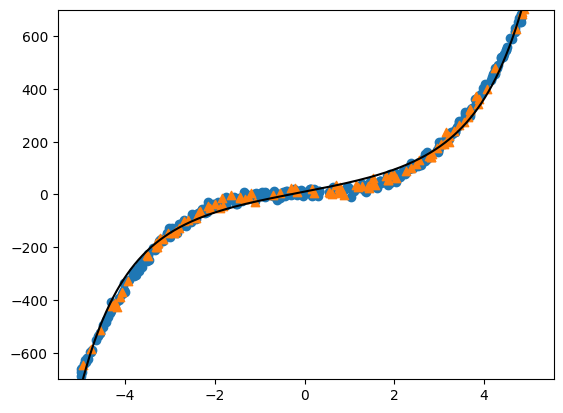

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   10.711795409086571   |
|      x      |   32.93971549535049    |
|     x^2     |   0.5781480692142039   |
|     x^3     |   1.6923153143246017   |
|     x^4     |  0.01636439509188516   |
|     x^5     |  0.057243089273304223  |
|     x^6     | 0.0002960912446240231  |
|     x^7     |  0.001670402434322895  |
|     x^8     | -2.586174227662568e-06 |
|     x^9     | 4.305076003176132e-05  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [10]:
#display_results(model_elastic_reg)
display_results(model_elastic_reg, train_data, validation_data)

### Question 4
- Compare the training and validation error of model_elastic_reg. Comment on what this implies in terms of overfitting and/or underfitting.

#### The errors are both relatively high, with a training error (RMSE: 25.849) and a validation error (RMSE: 25.394), suggesting that the model might not be capturing the underlying patterns in the data very well. This implies a degree of underfitting, and further adjustments to the model complexity or features may be considered to improve its performance.

#### By adjusting the plot limits with plt.ylim(-700,700) seems to improve the fit of the line to the data, suggesting that exploring different visualizations and adjustments may be valuable in understanding and refining the model.

In [11]:
# Define the range of degrees
degrees = [i for i in range(1, 11)]
print(degrees)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [12]:
# Define the range of the values
l1_values = [0, 0.1, 1.0, 10.0]
l2_values = [0, 0.1, 1.0, 10.0]
n_values = [3, 5, 7, 10]

In [13]:
import pprint

def optimal_model(train_data, validation_data, degrees, l1_values, l2_values):
    train_error = []
    val_error = []
    min_val_rmse = float('inf')
    model_dictionary = {}
    indexes = []
    index = 1

    for n in n_values:
        for l1_penalty in l1_values:
            for l2_penalty in l2_values:
                if n in degrees:
                    features = ['x'] + [f'x^{j}' for j in range(2, n+1)]
                    model = tc.linear_regression.create(
                        train_data, target='y', l1_penalty=l1_penalty, l2_penalty=l2_penalty, verbose=False, validation_set=None, features=features)
                    train_rmse = model.evaluate(train_data)['rmse']
                    val_rmse = model.evaluate(validation_data)['rmse']
                    train_error.append(train_rmse)
                    val_error.append(val_rmse)
                    indexes.append(index)
                    model_dictionary[index] = {'n': n, 'l1_penalty': l1_penalty, 'l2_penalty': l2_penalty, 'train_rmse':train_rmse, 'val_rmse':val_rmse}
                    index+=1

                    if val_rmse < min_val_rmse:
                        min_val_rmse = val_rmse
                        optimal_model = model

    indices = list(range(len(train_error)))
    plt.scatter(indices, train_error, label='Training RMSE')
    plt.scatter(indices, val_error, label='Validation RMSE')
    plt.show()

    pprint.pprint(model_dictionary)
    print(optimal_model.coefficients)
    return optimal_model

In [14]:
#print(f"train error: {train_error} \n")
#print(f"validation error: {val_error} \n")
#print(f"minimum value rmse: {min_val_rmse} \n")
#print(f"indices: {indices} \n")

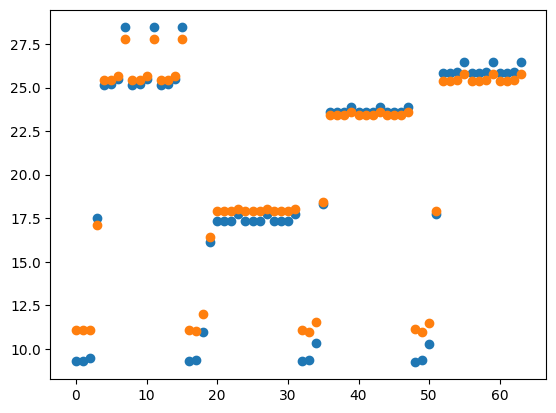

{1: {'l1_penalty': 0,
     'l2_penalty': 0,
     'n': 3,
     'train_rmse': 9.295777886870248,
     'val_rmse': 11.080882957739506},
 2: {'l1_penalty': 0,
     'l2_penalty': 0.1,
     'n': 3,
     'train_rmse': 9.297833815211662,
     'val_rmse': 11.06631801649653},
 3: {'l1_penalty': 0,
     'l2_penalty': 1.0,
     'n': 3,
     'train_rmse': 9.487689635986625,
     'val_rmse': 11.073537564542967},
 4: {'l1_penalty': 0,
     'l2_penalty': 10.0,
     'n': 3,
     'train_rmse': 17.48883545976431,
     'val_rmse': 17.083653310776395},
 5: {'l1_penalty': 0.1,
     'l2_penalty': 0,
     'n': 3,
     'train_rmse': 25.16864336827908,
     'val_rmse': 25.4269101039419},
 6: {'l1_penalty': 0.1,
     'l2_penalty': 0.1,
     'n': 3,
     'train_rmse': 25.200474057783598,
     'val_rmse': 25.449134394507826},
 7: {'l1_penalty': 0.1,
     'l2_penalty': 1.0,
     'n': 3,
     'train_rmse': 25.488626668055627,
     'val_rmse': 25.65048808154668},
 8: {'l1_penalty': 0.1,
     'l2_penalty': 10.0,
     

In [15]:
optimal_model = optimal_model(train_data, validation_data, degrees, l1_values, l2_values)

### Question 6
- By referring to training error, validation error, complexity, and scatter plots, select the best set of parameters for optimal_model and justify your choice.

#### Index 34 stands out as a favorable model configuration among the options provided. With a non-zero l2_penalty of 0.1, a higher number of features (n set to 7), and lower root mean square error (RMSE) values, this configuration appears to strike a good balance between capturing complex patterns in the data and avoiding overfitting. The chosen configuration demonstrates effectiveness in minimizing prediction errors and has potential for robust performance on new data.

### Question 7
- Use the modified display_results() function to display the results of optimal_model. Compare this with the results of model_elastic_reg, and explain which model is better. After selecting the best model, use that to calculate the error on the testing data.

Training error (rmse): 9.369303393160688
Validation error (rmse): 10.964664443614192


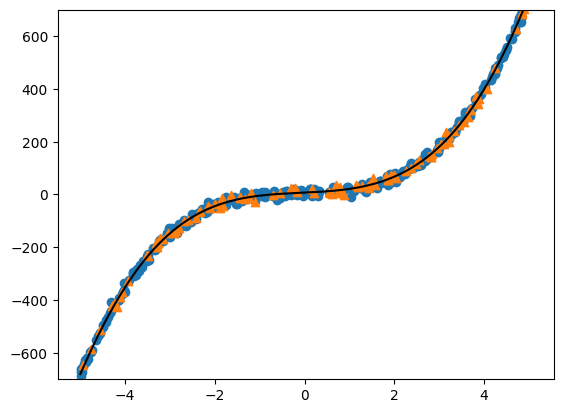

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   7.151375403346179    |
|      x      |   7.972434348920903    |
|     x^2     |   1.2468848781541584   |
|     x^3     |   4.778971301809232    |
|     x^4     |  -0.0281943564304709   |
|     x^5     |  0.05502805565612615   |
|     x^6     |  0.000942836773590144  |
|     x^7     | -0.0011972869601133234 |
+-------------+------------------------+
[8 rows x 2 columns]

Training error (rmse): 25.849060873117235
Validation error (rmse): 25.394336907036823


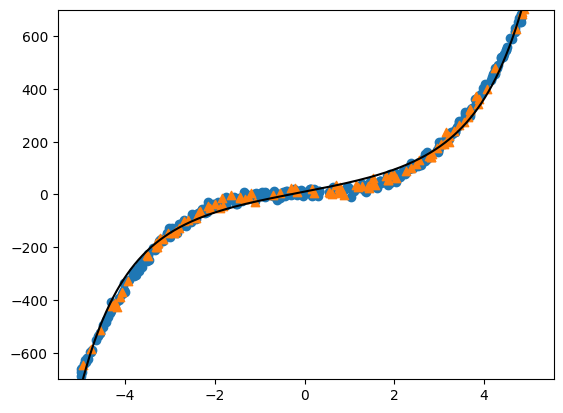

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   10.711795409086571   |
|      x      |   32.93971549535049    |
|     x^2     |   0.5781480692142039   |
|     x^3     |   1.6923153143246017   |
|     x^4     |  0.01636439509188516   |
|     x^5     |  0.057243089273304223  |
|     x^6     | 0.0002960912446240231  |
|     x^7     |  0.001670402434322895  |
|     x^8     | -2.586174227662568e-06 |
|     x^9     | 4.305076003176132e-05  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [16]:
# Display results for optimal_model
display_results(optimal_model, train_data, validation_data)

# Display results for model_elastic_reg for comparison
display_results(model_elastic_reg, train_data, validation_data)

#### The optimal_model has a lower training error (9.369303393160688) compared to model_elastic_reg (25.849060873117235).
#### The optimal_model also has a lower validation error (10.964664443614192) compared to model_elastic_reg (25.394336907036823).

####  The optimal_model with a lower RMSE on both training and validation datasets, is considered better in terms of predictive performance.

In [18]:
print(f"Testing error (RMSE) for optimal_model: {optimal_model.evaluate(test_data)}")
#optimal_model.evaluate(test_data)

Testing error (RMSE) for optimal_model: {'max_error': 28.260705443844643, 'rmse': 11.382985397698977}


### Contributions

**Mariah:**
- Questions #1, #2-4, #6-7: Conducted the analysis, calculations, and coding.
- Formatting and finalizing the entire notebook.
- Submitted the assignment.

**Weiwei:**
- Question #5: Initiated the attempt, with subsequent corrections by Mariah.
- Limited involvement in all questions.
- Sought feedback from the teacher on the plot.
- Corrected coefficients in Question #1.
- Provided explanations for the questions.

**Note:** Originally, Questions #5-6 were assigned to Weiwei, but due to coding issues, Mariah made corrections and completed both sections. Weiwei played a role in the explanation of questions and corrected coefficients.